# KFall Dataset-Classification

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import time
from scipy import signal
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
cd /gdrive/My\Drive/KFall

/gdrive/MyDrive/KFall


# EDA

In [4]:
df = pd.read_csv('sensor_data/SA06/S06T25R04.csv')

In [5]:
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.grid'] = False

In [6]:
df_abs = df.abs()

In [7]:
#Correaltion Matrix
df.corr().style.background_gradient(cmap='coolwarm')

,TimeStamp(s),FrameCounter,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ
TimeStamp(s),1.000000,1.000000,-0.397746,0.607996,-0.627843,0.321176,0.118435,-0.020553,-0.854003,-0.723891,0.839506
FrameCounter,1.000000,1.000000,-0.397746,0.607996,-0.627843,0.321176,0.118435,-0.020553,-0.854003,-0.723891,0.839506
AccX,-0.397746,-0.397746,1.000000,-0.597771,0.844648,-0.424464,-0.190873,-0.199558,0.474131,0.691425,-0.438483
AccY,0.607996,0.607996,-0.597771,1.000000,-0.745705,0.393918,-0.332150,0.197467,-0.833652,-0.765876,0.680406
AccZ,-0.627843,-0.627843,0.844648,-0.745705,1.000000,-0.461600,-0.145712,-0.187274,0.710742,0.778037,-0.583049
GyrX,0.321176,0.321176,-0.424464,0.393918,-0.461600,1.000000,-0.134303,-0.151390,-0.240821,-0.617044,0.453462
GyrY,0.118435,0.118435,-0.190873,-0.332150,-0.145712,-0.134303,1.000000,0.006912,0.088584,-0.024046,0.023569
GyrZ,-0.020553,-0.020553,-0.199558,0.197467,-0.187274,-0.151390,0.006912,1.000000,-0.158407,0.003240,0.104078
EulerX,-0.854003,-0.854003,0.474131,-0.833652,0.710742,-0.240821,0.088584,-0.158407,1.000000,0.811490,-0.790232
EulerY,-0.723891,-0.723891,0.691425,-0.765876,0.778037,-0.617044,-0.024046,0.003240,0.811490,1.000000,-0.790550


In [8]:
#Corelation of absolute values
df_abs.corr().style.background_gradient(cmap='coolwarm')

,TimeStamp(s),FrameCounter,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ
TimeStamp(s),1.000000,1.000000,0.227781,-0.793253,0.629486,-0.391486,-0.182999,-0.209210,-0.858235,0.689478,-0.839506
FrameCounter,1.000000,1.000000,0.227781,-0.793253,0.629486,-0.391486,-0.182999,-0.209210,-0.858235,0.689478,-0.839506
AccX,0.227781,0.227781,1.000000,-0.153600,0.747565,0.017251,0.361518,0.545716,-0.414550,0.504648,-0.259639
AccY,-0.793253,-0.793253,-0.153600,1.000000,-0.416232,0.357600,0.145156,0.161183,0.793832,-0.713117,0.813354
AccZ,0.629486,0.629486,0.747565,-0.416232,1.000000,-0.204037,0.198760,0.235043,-0.713834,0.786057,-0.585117
GyrX,-0.391486,-0.391486,0.017251,0.357600,-0.204037,1.000000,0.571869,0.536155,0.118928,-0.350683,0.488791
GyrY,-0.182999,-0.182999,0.361518,0.145156,0.198760,0.571869,1.000000,0.552491,-0.177708,0.037468,0.124710
GyrZ,-0.209210,-0.209210,0.545716,0.161183,0.235043,0.536155,0.552491,1.000000,-0.098761,0.064057,0.224236
EulerX,-0.858235,-0.858235,-0.414550,0.793832,-0.713834,0.118928,-0.177708,-0.098761,1.000000,-0.840036,0.793130
EulerY,0.689478,0.689478,0.504648,-0.713117,0.786057,-0.350683,0.037468,0.064057,-0.840036,1.000000,-0.767085


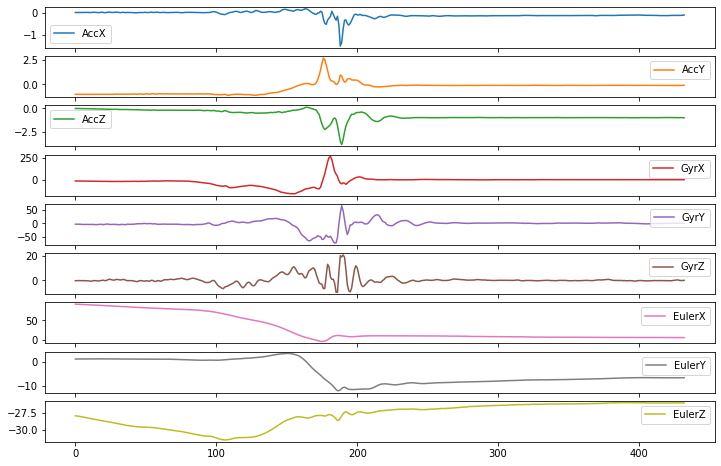

In [9]:
#Plotting the signals
plot_cols = ['AccX', 'AccY', 'AccZ','GyrX','GyrY','GyrZ','EulerX','EulerY','EulerZ' ]
plot_features = df[plot_cols]
#plot_features.index = date_time
_ = plot_features.plot(subplots=True)



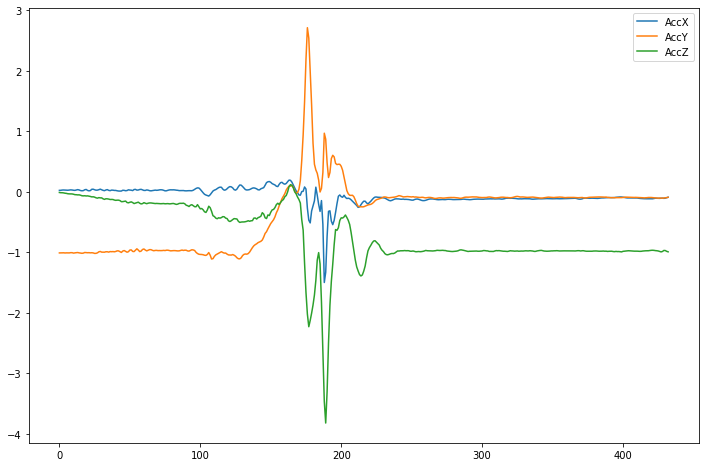

In [10]:
# one sensore, All Directions 
cols = ['AccX', 'AccY', 'AccZ']
plot_features = df[cols]
#plot_features.index = date_time
_ = plot_features.plot(subplots=False)


# Loading the Dataset 

In [11]:
#Defining range of subjects and fall tasks and trialas
subjects = np.arange(6,39)
tasks = np.arange(20,35)
trials = np.arange(1,6)


In [12]:
# Loading Falling activities
# Divinding them to train test & validation sets 
#in a way to make sure that we have all subjects and all activities are included in in all three sets
xtrain2 = []
ytrain2 = []
ztrain2 =[]

xtest2 = []
ytest2 = []
ztest2 = []

xval2 = []
yval2 = []
zval2 = []

ws = 50 #window size
st = 5 #Stepsize

lenght =[]

for i in subjects:
    
    print('Hello subject ',i,end=' !, ')
    for j in tasks:
        
        xx = []# signals
        yy = []# label
        zz = []# activity Id
        try:
            
            for k in trials:
                try:

                    filename = 'S'+ str(i).zfill(2) + 'T' + str(j).zfill(2) + 'R' + str(k).zfill(2) + '.csv'
                    #zfill(2)inghadr sefr ezafe mikone ta size berese be 2
                    labelfilename =  'SA'+ str(i).zfill(2) + '_label.xlsx'

                    label = pd.read_excel('label_data/'+labelfilename,index_col=None, header=None)[1:]
                    data = pd.read_csv('sensor_data/'+'SA' + str(i).zfill(2)+'/'+filename)
                    #print(len(lable))

                    acc_x = np.array(data['AccX']).reshape((len(data),1))
                    acc_y = np.array(data['AccY']).reshape((len(data),1))
                    acc_z = np.array(data['AccZ']).reshape((len(data),1))
                    gyro_x = np.array(data['GyrX']).reshape((len(data),1))
                    gyro_y = np.array(data['GyrY']).reshape((len(data),1))
                    gyro_z = np.array(data['GyrZ']).reshape((len(data),1))
                    euler_x = np.array(data['EulerX']).reshape((len(data),1))
                    euler_y = np.array(data['EulerX']).reshape((len(data),1))
                    euler_z = np.array(data['EulerX']).reshape((len(data),1))
                    
                    ############


                    data = np.concatenate([acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,euler_x,euler_y,euler_z],axis = -1)
                    lenght.append(data.shape[0])

                    activity = 0
                    for row in range(len(label)):
                        trial = int(label.iloc[row][2])
                            #trial = int(z)
                        if not pd.isnull(label.iloc[row][0]):
                            #activity ro khoondim
                            activity = int(label.iloc[row][0][5:7])
                        pf = label.iloc[row][3]-1 #prefall point
                        f = label.iloc[row][4]-1 #fall point
                        #inja 50 taye vasat ro gereftim
                        
                        if f - pf < 50 : continue

                        if trial == k and activity == j :
                            start = int(pf-ws+3)
                            #end = int(f-((f-pf)-50/2))
                            #end = int(f-ws)
                            end = int(pf+((f - pf) - 50 )/2)
                            
                            for x in range(start,end,st):
                                xx.append(data[x:x+ws])
                                yy.append(1)
                                zz.append(j)
                            

                except : continue
            
            xtrain,xtest,ytrain,ytest,ztrain,ztest = train_test_split(xx,yy,zz,train_size = 0.7)
            xtest,xval,ytest,yval,ztest,zval = train_test_split(xtest,ytest,ztest,train_size = 0.5) 

            xtrain2 += xtrain
            ytrain2 += ytrain
            ztrain2 +=ztrain

            xtest2 += xtest
            ytest2 += ytest
            ztest2 += ztest

            xval2 += xval
            yval2 += yval
            zval2 += zval
        except : continue
        
    
    
    
print(len(lenght))

Hello subject  6 !, Hello subject  7 !, Hello subject  8 !, Hello subject  9 !, Hello subject  10 !, Hello subject  11 !, Hello subject  12 !, Hello subject  13 !, Hello subject  14 !, Hello subject  15 !, Hello subject  16 !, Hello subject  17 !, Hello subject  18 !, Hello subject  19 !, Hello subject  20 !, Hello subject  21 !, Hello subject  22 !, Hello subject  23 !, Hello subject  24 !, Hello subject  25 !, Hello subject  26 !, Hello subject  27 !, Hello subject  28 !, Hello subject  29 !, Hello subject  30 !, Hello subject  31 !, Hello subject  32 !, Hello subject  33 !, Hello subject  34 !, Hello subject  35 !, Hello subject  36 !, Hello subject  37 !, Hello subject  38 !, 2319


In [13]:
#checking the structure and size
t1=np.array(xtrain2)
t2=np.array(ytrain2)
t3=np.array(ztrain2)

In [14]:
print(t1.shape)
print(t2.shape)
print(t3.shape)

(18711, 50, 9)
(18711,)
(18711,)


In [15]:
# Loading ADLs  and doing the same steps as Falling ones an adding them to falling ones
st =5
lenght2=[]
for i in subjects:
    
    print('Goodbye subject ',i,end=' !, ')
    for j in np.arange(1,40):
        if j in tasks : continue
        try:
        
            xx = []
            yy = []
            zz = []

            for k in trials:
                try :
                    filename = 'S'+ str(i).zfill(2) + 'T' + str(j).zfill(2) + 'R' + str(k).zfill(2) + '.csv'

                    data = pd.read_csv('sensor_data/'+'SA' + str(i).zfill(2)+'/'+filename)

                    acc_x = np.array(data['AccX']).reshape((len(data),1))
                    acc_y = np.array(data['AccY']).reshape((len(data),1))
                    acc_z = np.array(data['AccZ']).reshape((len(data),1))
                    gyro_x = np.array(data['GyrX']).reshape((len(data),1))
                    gyro_y = np.array(data['GyrY']).reshape((len(data),1))
                    gyro_z = np.array(data['GyrZ']).reshape((len(data),1))
                    euler_x = np.array(data['EulerX']).reshape((len(data),1))
                    euler_y = np.array(data['EulerX']).reshape((len(data),1))
                    euler_z = np.array(data['EulerX']).reshape((len(data),1))

                    data = np.concatenate([acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,euler_x,euler_y,euler_z],axis = -1)
                    lenght2.append(data.shape[0])

                    cnt = 0
                    if data.shape[0] < 100 : continue

                    if j in [1,11,12,17] :
                        for x in range(50,data.shape[0]-50,st):
                            xx.append(data[x:x+50])
                            yy.append(0)
                            zz.append(j)
                            cnt += 1
                            if cnt == 100:break
                    else : 
                        for x in range(50,data.shape[0]-50,st):
                            xx.append(data[x:x+50])
                            yy.append(0)
                            zz.append(j)
                            cnt += 1
                            if cnt == 20:break

                except : continue


            xtrain,xtest,ytrain,ytest,ztrain,ztest = train_test_split(xx,yy,zz,train_size = 0.7)
            xtest,xval,ytest,yval,ztest,zval = train_test_split(xtest,ytest,ztest,train_size = 0.5) 
            

            xtrain2 += xtrain
            ytrain2 += ytrain
            ztrain2 += ztrain

            xtest2 += xtest
            ytest2 += ytest
            ztest2 += ztest

            xval2 += xval
            yval2 += yval
            zval2 += zval
        except : continue
        
    

xtrain2 = np.array(xtrain2)
ytrain2 = np.array(ytrain2)
ztrain2 = np.array(ztrain2)

xtest2 = np.array(xtest2)
ytest2 = np.array(ytest2)
ztest2 = np.array(ztest2)

xval2 = np.array(xval2)
yval2 = np.array(yval2)
zval2 = np.array(zval2)
print(min(lenght2),max(lenght2),sum(lenght2)/len(lenght2))

Goodbye subject  6 !, Goodbye subject  7 !, Goodbye subject  8 !, Goodbye subject  9 !, Goodbye subject  10 !, Goodbye subject  11 !, Goodbye subject  12 !, Goodbye subject  13 !, Goodbye subject  14 !, Goodbye subject  15 !, Goodbye subject  16 !, Goodbye subject  17 !, Goodbye subject  18 !, Goodbye subject  19 !, Goodbye subject  20 !, Goodbye subject  21 !, Goodbye subject  22 !, Goodbye subject  23 !, Goodbye subject  24 !, Goodbye subject  25 !, Goodbye subject  26 !, Goodbye subject  27 !, Goodbye subject  28 !, Goodbye subject  29 !, Goodbye subject  30 !, Goodbye subject  31 !, Goodbye subject  32 !, Goodbye subject  33 !, Goodbye subject  34 !, Goodbye subject  35 !, Goodbye subject  36 !, Goodbye subject  37 !, Goodbye subject  38 !, 204 4087 832.6665439823335


In [16]:
print(xtrain2.shape,ytrain2.shape, ztrain2.shape)
print(yval2[:5])
print(np.unique(ytrain2))

(63917, 50, 9) (63917,) (63917,)
[1 1 1 1 1]
[0 1]


In [17]:
# one-hot
ytrain1 = []
for i in ytrain2:
    ytrain1.append([0]*2)
    ytrain1[-1][i] = 1
ytrain2 = np.array(ytrain1)
#####

ytest1 = []
for i in ytest2:
    ytest1.append([0]*2)
    ytest1[-1][i] = 1
ytest2 = np.array(ytest1)

#####
yval1 = []
for i in yval2:
    yval1.append([0]*2)
    yval1[-1][i] = 1
yval2 = np.array(yval1)

In [18]:
xtrain2.shape,ytrain2.shape,xtest2.shape,ytest2.shape,xval2.shape,yval2.shape

((63917, 50, 9),
 (63917, 2),
 (13733, 50, 9),
 (13733, 2),
 (13968, 50, 9),
 (13968, 2))

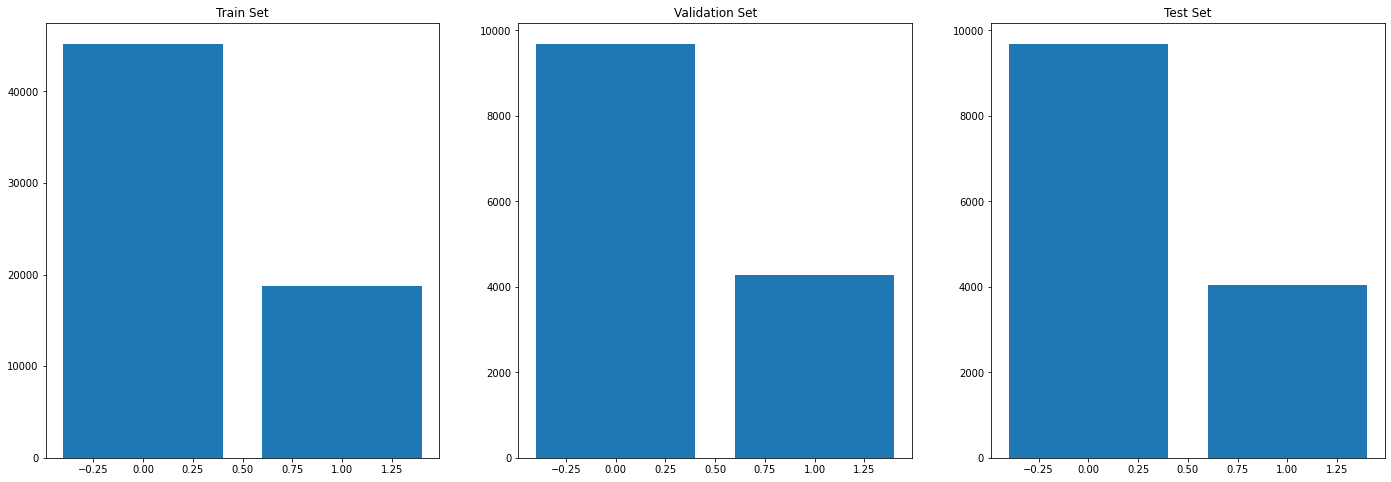

In [19]:
plt.figure(figsize = (24,8))
plt.subplot(1,3,1)
plt.title("Train Set")
plt.bar(np.arange(0,2),sum(ytrain2))

plt.subplot(1,3,2)
plt.title("Validation Set")
plt.bar(np.arange(0,2),sum(yval2))

plt.subplot(1,3,3)
plt.title("Test Set")
plt.bar(np.arange(0,2),sum(ytest2))
plt.show()

# CNN

In [21]:
#Best in the sence of balance accuracy between tasks# 1 is 2
def model1_cnn(input_shape,number_of_activities):
    input_layer = keras.Input(shape = input_shape)
    
    cnn = layers.Conv1D(24,2,1,"same", name ='Conv1D_1')(input_layer)
    cnn = layers.Conv1D(72,2,1,"same",name = 'Conv1D_2')(cnn)
    cnn = layers.MaxPool1D(1)(cnn)#
    cnn = layers.Dropout(rate = 0.1)(cnn)#
    
    cnn = layers.Conv1D(144,2,1,"same",name = 'Conv1D_3')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_1')(cnn)
    cnn = layers.Conv1D(288,2,1,"same",name = 'Conv1D_4')(cnn)#
    
    cnn = layers.Flatten()(cnn)
    
    
    cnn = layers.Dense(288,activation='relu',name = 'dense_0')(cnn)#
    cnn = layers.Dense(144,activation='relu',name = 'dense_1')(cnn)
    cnn = layers.Dense(72,activation='relu',name = 'dense_2')(cnn)
    cnn = layers.Dense(24,activation='relu',name = 'dense_3')(cnn)
    cnn = layers.Dense(number_of_activities,activation='softmax',name = 'dense_4')(cnn)
    
    return keras.Model(input_layer,cnn,name = 'model1')

In [22]:
cnn2 = model1_cnn(xtrain2.shape[1:],2)

In [23]:
cnn2.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 9)]           0         
                                                                 
 Conv1D_1 (Conv1D)           (None, 50, 24)            456       
                                                                 
 Conv1D_2 (Conv1D)           (None, 50, 72)            3528      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 72)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 72)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 50, 144)           20880     
                                                            

In [24]:

# Training 
optimizers = tf.keras.optimizers.Adagrad(learning_rate=0.001)
cnn2.compile(loss = 'binary_crossentropy',optimizer=optimizers,metrics=['accuracy'])
cnn_history = cnn2.fit(
    xtrain2,
    ytrain2,
    validation_data = (
        xval2,
        yval2
    ),
    epochs = 30,
    batch_size = 100,
)


Epoch 1/30
640/640 [==============================] - 18s 9ms/step - loss: 0.4662 - accuracy: 0.7937 - val_loss: 0.4248 - val_accuracy: 0.8109
Epoch 2/30
640/640 [==============================] - 5s 8ms/step - loss: 0.4035 - accuracy: 0.8195 - val_loss: 0.3892 - val_accuracy: 0.8304
Epoch 3/30
640/640 [==============================] - 5s 9ms/step - loss: 0.3690 - accuracy: 0.8416 - val_loss: 0.4186 - val_accuracy: 0.8291
Epoch 4/30
640/640 [==============================] - 5s 8ms/step - loss: 0.3478 - accuracy: 0.8533 - val_loss: 0.3845 - val_accuracy: 0.8419
Epoch 5/30
640/640 [==============================] - 6s 9ms/step - loss: 0.3331 - accuracy: 0.8593 - val_loss: 0.3245 - val_accuracy: 0.8615
Epoch 6/30
640/640 [==============================] - 5s 8ms/step - loss: 0.3214 - accuracy: 0.8652 - val_loss: 0.3145 - val_accuracy: 0.8663
Epoch 7/30
640/640 [==============================] - 5s 8ms/step - loss: 0.3119 - accuracy: 0.8707 - val_loss: 0.3287 - val_accuracy: 0.8635
Epoch

In [25]:
ypred = cnn2.predict(xtest2)
ytemp = []
for i in ypred:
    pred = [0]*2
    pred[np.argmax(i)] = 1
    ytemp.append(pred)
ypred = np.array(ytemp)

430/430 [==============================] - 1s 3ms/step


In [26]:
# Testing accuracy

cnt = 0
for i in range(len(ypred)):
    if (ypred[i] == ytest2[i]).all() : cnt += 1
        
print('test accuracy = ',cnt / len(ypred) * 100)

test accuracy =  90.41724313696933


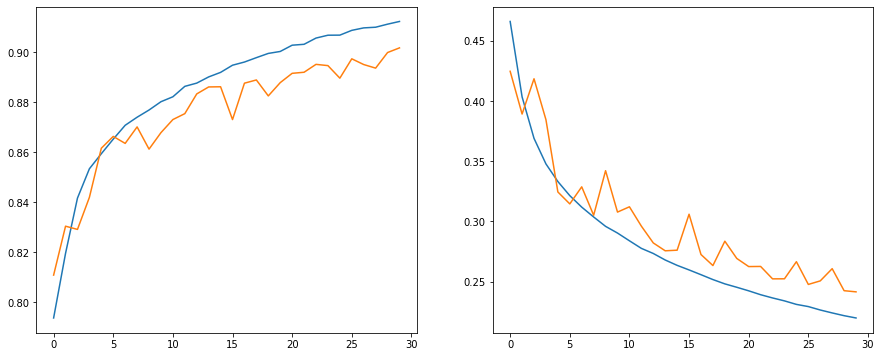

In [27]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(cnn_history.history['accuracy'],label="accuracy")
plt.plot(cnn_history.history['val_accuracy'],label="val_accuracy")
plt.subplot(1,2,2)
plt.plot(cnn_history.history['loss'],label = "loss")
plt.plot(cnn_history.history['val_loss'],label = "val_loss")
plt.show()

In [28]:
test_cm = confusion_matrix(ytest2.argmax(axis = 1),ypred.argmax(axis = 1))

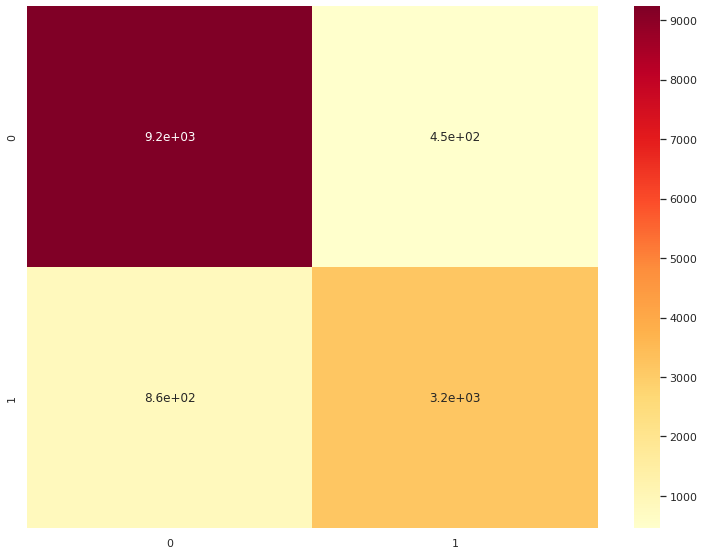

In [29]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(test_cm,annot = True, cmap = 'YlOrRd')

In [30]:
print(sklearn.metrics.classification_report(ytest2.argmax(axis = 1),ypred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      9687
           1       0.88      0.79      0.83      4046

    accuracy                           0.90     13733
   macro avg       0.89      0.87      0.88     13733
weighted avg       0.90      0.90      0.90     13733



In [31]:
cnt = np.zeros(len(tasks))
cnt_t = np.zeros(len(tasks))

for i in range (len(ypred)):
    for j in range(len(tasks)):
        if ztest2[i]==tasks[j]:
            cnt_t[j] += 1
            if (ypred[i] == ytest2[i]).all():
                cnt[j] +=1

for j in range(len(tasks)):
    c = cnt[j]/cnt_t[j]*100
    print("for task " + str(tasks[j]) + " the accuracy is: " + str(c))
            
     

for task 20 the accuracy is: 67.97385620915033
for task 21 the accuracy is: 40.0
for task 22 the accuracy is: 90.33457249070632
for task 23 the accuracy is: 66.33986928104575
for task 24 the accuracy is: 91.32075471698113
for task 25 the accuracy is: 70.87087087087087
for task 26 the accuracy is: 90.2027027027027
for task 27 the accuracy is: 96.20253164556962
for task 28 the accuracy is: 58.9041095890411
for task 29 the accuracy is: 87.35632183908046
for task 30 the accuracy is: 80.36363636363636
for task 31 the accuracy is: 83.65758754863813
for task 32 the accuracy is: 79.92565055762083
for task 33 the accuracy is: 95.54655870445345
for task 34 the accuracy is: 79.03225806451613


# LSTM

In [32]:
#LSTM-1
def build_lstm1(input_shape,number_of_activities):
    input_layer = keras.Input(shape = input_shape,name = 'title_0')
    
    lstm = layers.LSTM(36,return_sequences = True,name = 'lstm_1')(input_layer)
    lstm = layers.LayerNormalization()(lstm)
    lstm = layers.Dropout(rate = 0.2)(lstm)

    lstm = layers.LSTM(72,return_sequences = False,name = 'lstm_2')(lstm)
    lstm = layers.LayerNormalization()(lstm)
    
    
    lstm = layers.Dense(72,name = 'dense_1')(lstm)
    lstm = layers.Dense(number_of_activities,name = 'dense_2',activation = 'softmax')(lstm)
    
    return keras.Model(input_layer,lstm)

In [33]:
lstm1 = build_lstm1(xtrain2.shape[1:],2)

In [34]:
lstm1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_0 (InputLayer)        [(None, 50, 9)]           0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 36)            6624      
                                                                 
 layer_normalization (LayerN  (None, 50, 36)           72        
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 50, 36)            0         
                                                                 
 lstm_2 (LSTM)               (None, 72)                31392     
                                                                 
 layer_normalization_1 (Laye  (None, 72)               144       
 rNormalization)                                             

In [35]:
lstm1.compile(loss = 'binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
lstm_history = lstm1.fit(
    xtrain2,
    ytrain2,
    validation_data = (
        xval2,
        yval2
    ),
    epochs = 20,
    batch_size = 100,
)

Epoch 1/20
640/640 [==============================] - 14s 12ms/step - loss: 0.3444 - accuracy: 0.8478 - val_loss: 0.2781 - val_accuracy: 0.8803
Epoch 2/20
640/640 [==============================] - 7s 12ms/step - loss: 0.2645 - accuracy: 0.8896 - val_loss: 0.2363 - val_accuracy: 0.8998
Epoch 3/20
640/640 [==============================] - 7s 10ms/step - loss: 0.2347 - accuracy: 0.9022 - val_loss: 0.2173 - val_accuracy: 0.9126
Epoch 4/20
640/640 [==============================] - 7s 12ms/step - loss: 0.2132 - accuracy: 0.9142 - val_loss: 0.2044 - val_accuracy: 0.9166
Epoch 5/20
640/640 [==============================] - 7s 11ms/step - loss: 0.1982 - accuracy: 0.9197 - val_loss: 0.2010 - val_accuracy: 0.9195
Epoch 6/20
640/640 [==============================] - 8s 12ms/step - loss: 0.1877 - accuracy: 0.9247 - val_loss: 0.2173 - val_accuracy: 0.9097
Epoch 7/20
640/640 [==============================] - 7s 11ms/step - loss: 0.1795 - accuracy: 0.9288 - val_loss: 0.1779 - val_accuracy: 0.927

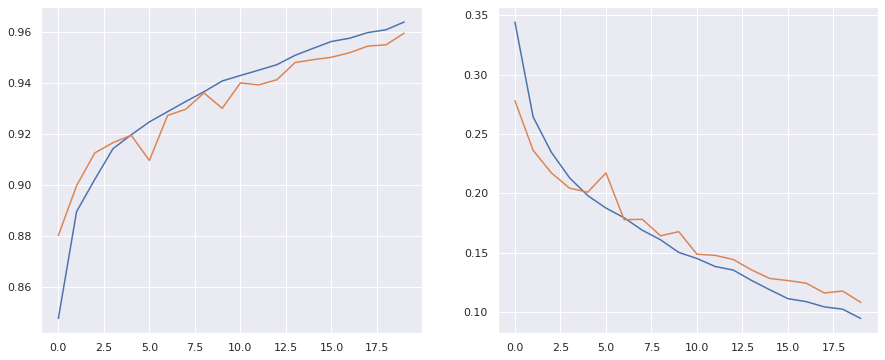

In [36]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.subplot(1,2,2)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.show()

In [37]:
ypred = lstm1.predict(xtest2)
ytemp = []
for i in ypred:
    pred = [0]*2
    pred[np.argmax(i)] = 1
    ytemp.append(pred)
ypred = np.array(ytemp)

430/430 [==============================] - 3s 5ms/step


In [38]:
# Testing accuracy

cnt = 0
for i in range(len(ypred)):
    if (ypred[i] == ytest2[i]).all() : cnt += 1
        
print('test accuracy = ',cnt / len(ypred) * 100)

test accuracy =  96.11155610573073


In [39]:
test_cm = confusion_matrix(ytest2.argmax(axis = 1),ypred.argmax(axis = 1))

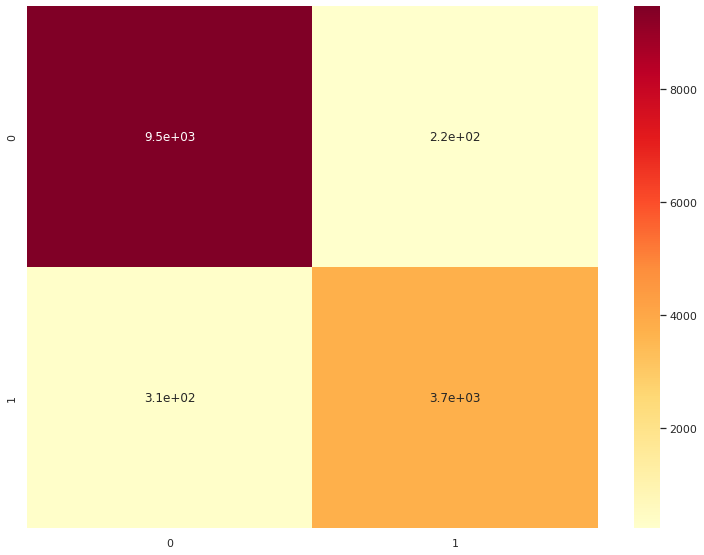

In [40]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(test_cm,annot = True, cmap = 'YlOrRd')

In [41]:
print(sklearn.metrics.classification_report(ytest2.argmax(axis = 1),ypred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9687
           1       0.94      0.92      0.93      4046

    accuracy                           0.96     13733
   macro avg       0.96      0.95      0.95     13733
weighted avg       0.96      0.96      0.96     13733



In [42]:
cnt = np.zeros(len(tasks))
cnt_t = np.zeros(len(tasks))

for i in range (len(ypred)):
    for j in range(len(tasks)):
        if ztest2[i]==tasks[j]:
            cnt_t[j] += 1
            if (ypred[i] == ytest2[i]).all():
                cnt[j] +=1

for j in range(len(tasks)):
    c = cnt[j]/cnt_t[j]*100
    print("for task " + str(tasks[j]) + " the accuracy is: " + str(c))
            

for task 20 the accuracy is: 94.44444444444444
for task 21 the accuracy is: 67.56756756756756
for task 22 the accuracy is: 95.91078066914498
for task 23 the accuracy is: 91.83006535947712
for task 24 the accuracy is: 95.47169811320755
for task 25 the accuracy is: 88.58858858858859
for task 26 the accuracy is: 94.93243243243244
for task 27 the accuracy is: 97.8902953586498
for task 28 the accuracy is: 85.61643835616438
for task 29 the accuracy is: 96.93486590038314
for task 30 the accuracy is: 93.0909090909091
for task 31 the accuracy is: 94.55252918287937
for task 32 the accuracy is: 92.56505576208178
for task 33 the accuracy is: 97.16599190283401
for task 34 the accuracy is: 93.54838709677419


# CNN + LSTM

In [78]:
def build_conv_lstm(input_shape,number_of_activities,seq = 0):
    input_layer = keras.Input(shape = input_shape,name = 'title_')
    
    cnn = layers.Conv1D(36,2,1,"same",name = 'Conv1D_'+str(seq)+'_1')(input_layer)
    cnn = layers.LayerNormalization(name = 'layernorm_'+str(seq)+'_1')(cnn)
    cnn = layers.Dropout(rate = 0.1)(cnn)
    
    cnn = layers.Conv1D(144,2,1,"same",name = 'Conv1D_2'+str(seq)+'_1')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_2'+str(seq)+'_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)

    cnn = layers.Conv1D(288,2,1,"same",name = 'Conv1D_3'+str(seq)+'_1')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_3'+str(seq)+'_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)
    cnn = layers.Dropout(rate = 0.1)(cnn)
    
    cnn = layers.Conv1D(512,2,1,"same",name = 'Conv1D_4'+str(seq)+'_1')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_4'+str(seq)+'_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)
    
    cnn = layers.Conv1D(288,2,1,"same",name = 'Conv1D_5'+str(seq)+'_1')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_5'+str(seq)+'_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)
    cnn = layers.Dropout(rate = 0.1)(cnn)#old
    
    cnn = layers.Conv1D(144,2,1,"same",name = 'Conv1D_6'+str(seq)+'_1')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_6'+str(seq)+'_1')(cnn)
    cnn = layers.MaxPool1D(2)(cnn)

    
        
    lstm = layers.LSTM(144,return_sequences = True,name = 'lstm_1')(cnn)
    lstm = layers.Dropout(rate = 0.5)(lstm)
    lstm = layers.LSTM(64,name = 'lstm_2')(lstm)
    lstm = layers.Dropout(rate = 0.5)(lstm)
    
    lstm = layers.Dense(64,name = 'dense_1')(lstm)
    lstm = layers.Dense(number_of_activities,name = 'dense_2',activation = 'softmax')(lstm)
    
    return keras.Model(input_layer,lstm)

In [79]:
conv_lstm = build_conv_lstm(xtrain2.shape[1:],ytrain2.shape[1])

In [80]:
conv_lstm.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_ (InputLayer)         [(None, 50, 9)]           0         
                                                                 
 Conv1D_0_1 (Conv1D)         (None, 50, 36)            684       
                                                                 
 layernorm_0_1 (LayerNormali  (None, 50, 36)           72        
 zation)                                                         
                                                                 
 dropout_16 (Dropout)        (None, 50, 36)            0         
                                                                 
 Conv1D_20_1 (Conv1D)        (None, 50, 144)           10512     
                                                                 
 layernorm_20_1 (LayerNormal  (None, 50, 144)          288       
 ization)                                                  

In [81]:
conv_lstm.compile(loss = 'binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
conv_lstm_history = conv_lstm.fit(
    xtrain2,
    ytrain2,
    validation_data = (
        xval2,
        yval2
    ),
    epochs = 30,
    batch_size = 100,
)

Epoch 1/30
640/640 [==============================] - 21s 18ms/step - loss: 0.4352 - accuracy: 0.7993 - val_loss: 0.3751 - val_accuracy: 0.8258
Epoch 2/30
640/640 [==============================] - 9s 14ms/step - loss: 0.3675 - accuracy: 0.8398 - val_loss: 0.3462 - val_accuracy: 0.8504
Epoch 3/30
640/640 [==============================] - 10s 16ms/step - loss: 0.3350 - accuracy: 0.8581 - val_loss: 0.2974 - val_accuracy: 0.8773
Epoch 4/30
640/640 [==============================] - 11s 16ms/step - loss: 0.3027 - accuracy: 0.8744 - val_loss: 0.3043 - val_accuracy: 0.8685
Epoch 5/30
640/640 [==============================] - 10s 15ms/step - loss: 0.2844 - accuracy: 0.8831 - val_loss: 0.2707 - val_accuracy: 0.8870
Epoch 6/30
640/640 [==============================] - 10s 15ms/step - loss: 0.2693 - accuracy: 0.8904 - val_loss: 0.2468 - val_accuracy: 0.8963
Epoch 7/30
640/640 [==============================] - 10s 15ms/step - loss: 0.2588 - accuracy: 0.8944 - val_loss: 0.2617 - val_accuracy: 

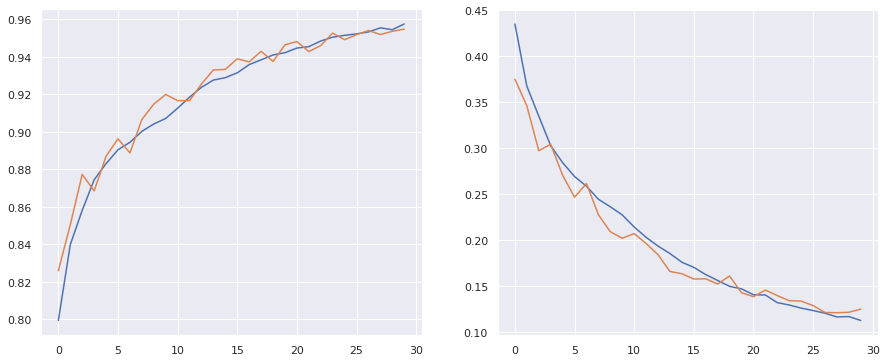

In [82]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(conv_lstm_history.history['accuracy'])
plt.plot(conv_lstm_history.history['val_accuracy'])
plt.subplot(1,2,2)
plt.plot(conv_lstm_history.history['loss'])
plt.plot(conv_lstm_history.history['val_loss'])
plt.show()

In [83]:
ypred = conv_lstm.predict(xtest2)
ytemp = []
for i in ypred:
    pred = [0]*(ytrain2.shape[1])
    pred[np.argmax(i)] = 1
    ytemp.append(pred)
ypred = np.array(ytemp)

430/430 [==============================] - 3s 5ms/step


In [84]:
# Testing accuracy

cnt = 0
for i in range(len(ypred)):
    if (ypred[i] == ytest2[i]).all() : cnt += 1
        
print('test accuracy = ',cnt / len(ypred) * 100)

test accuracy =  95.21590329862374


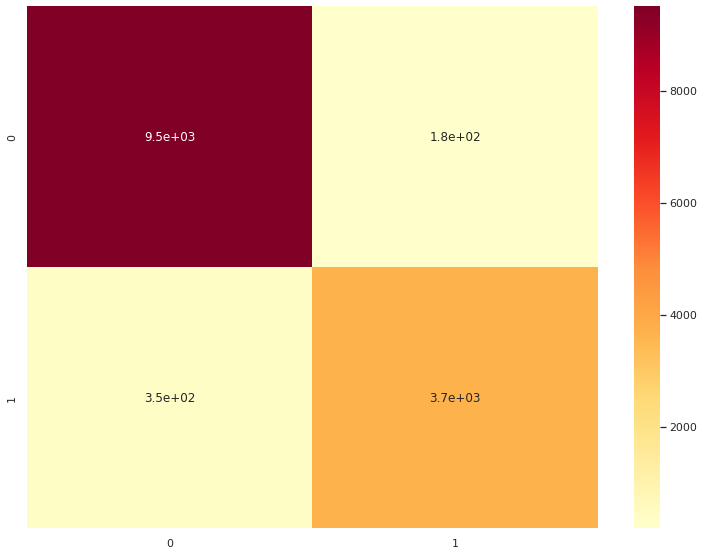

In [85]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(test_cm,annot = True, cmap = 'YlOrRd')

In [86]:
print(sklearn.metrics.classification_report(ytest2.argmax(axis = 1),ypred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9687
           1       0.94      0.90      0.92      4046

    accuracy                           0.95     13733
   macro avg       0.95      0.94      0.94     13733
weighted avg       0.95      0.95      0.95     13733



In [87]:
cnt = np.zeros(len(tasks))
cnt_t = np.zeros(len(tasks))

for i in range (len(ypred)):
    for j in range(len(tasks)):
        if ztest2[i]==tasks[j]:
            cnt_t[j] += 1
            if (ypred[i] == ytest2[i]).all():
                cnt[j] +=1

for j in range(len(tasks)):
    c = cnt[j]/cnt_t[j]*100
    print("for task " + str(tasks[j]) + " the accuracy is: " + str(c))
            

for task 20 the accuracy is: 86.27450980392157
for task 21 the accuracy is: 50.27027027027027
for task 22 the accuracy is: 96.28252788104089
for task 23 the accuracy is: 83.98692810457517
for task 24 the accuracy is: 95.84905660377359
for task 25 the accuracy is: 89.1891891891892
for task 26 the accuracy is: 95.27027027027027
for task 27 the accuracy is: 97.46835443037975
for task 28 the accuracy is: 81.16438356164383
for task 29 the accuracy is: 94.6360153256705
for task 30 the accuracy is: 92.72727272727272
for task 31 the accuracy is: 96.49805447470817
for task 32 the accuracy is: 90.70631970260223
for task 33 the accuracy is: 99.59514170040485
for task 34 the accuracy is: 91.12903225806451
